# Raízes de um polinômio

Um caso especial ocorre quando queremos achar as raízes de um polinômio.

A solução para este caso pode ser obtido convertendo o polinômio em uma matriz especial, chamada matriz companheira, e determinando os *autovalores* desta matriz.

No python, a função que implementa este método é chamada `roots`, presente na biblioteca `numpy`.

Suponha que você tenha o seguinte polinômio:

$
p(x) = x^3 - 2x^2 - 5x + 6
$

Para calcular as raízes do polinômio, executamos o comando `roots`:

In [38]:
import numpy as np
polinomio = [1, -2, -5, 6]
np.roots(polinomio)

array([-2.,  3.,  1.])

Para calcular o valor do polinômio em um ponto qualquer, utilizamos o comando `polyval`:

In [40]:
np.polyval(polinomio, 2)

-4

# Revisão

In [7]:
def bisseccao_laco_for(f, xl, xu, n):
    '''
    Executa o algoritmo de bisseccao n vezes.
    @f: funcao que desejamos achar o zero
    @xl: limite inferior
    @xu: limite superior
    @n: número de vezes que a bissecção será executada
    '''
    #print('xl     xu     xr')
    for i in range(n):
        xr = (xl + xu)/2

        #print(f'{xl:6.2f} {xu:6.2f} {xr:6.2f}')
        if (f(xl)*f(xr) < 0):
            xu = xr
        else:
            xl = xr
    return xr

In [8]:
def falsaposicao_laco_for(f, xl, xu, n):
    #print('xl     xu     xr')
    for i in range(n):
        xr = xu - f(xu)*(xl-xu)/(f(xl) - f(xu))
       
        #print(f'{xl:6.2f} {xu:6.2f} {xr:6.2f}')
        if (f(xl)*f(xr) < 0):
            xu = xr
        else:
            xl = xr
    return xr

In [9]:
def pontofixo_laco_for(g, x0, n):
    xi = x0
    for i in range(n):
        xi = g(xi)
    return xi

In [10]:
def newtonraphson_laco_for(f, df, x0, n):
    xvelho = x0
    for i in range(n):
        xnovo = xvelho - f(xvelho)/df(xvelho)
        erro_aproximado = abs((xnovo - xvelho)/xnovo)
        #print(f'{i} {xnovo:.6f} {erro_aproximado:.6%}')
        xvelho = xnovo  
    return xnovo

In [11]:
def secante_laco_for(f, x0, delta, n):
    xvelho = x0
    for i in range(n):
        xnovo = xvelho - delta*f(xvelho)/(f(xvelho+delta) - f(xvelho))
        erro_aproximado = abs((xnovo - xvelho)/xnovo)
        #print(f'{i} {xnovo:.6f} {erro_aproximado:.6%}')
        xvelho = xnovo
    return xnovo

# Scipy

In [96]:
from scipy import optimize

In [1]:
def f(x):
    return x**10 - 1

# usando no algoritmo de newton-rapshon
def df(x):
    return 10*x**9

# usado no algoritmo do ponto fixo
def g(x):
    return 1

In [17]:
def f(x):
    return np.exp(-x) - x

# usando no algoritmo de newton-rapshon
def df(x):
    return -x*np.exp(-x) - 1

def g(x):
    return np.exp(-x)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
%matplotlib widget
X = np.linspace(0,1.2,100)
Y = f(X)
plt.plot(X,Y)
mplcursors.cursor(hover=True)

In [19]:
from scipy import optimize
sol = optimize.bisect(f, 0,3, full_output=True)
print('Bissecção:\n', sol)
sol = optimize.brentq(f, 0,3, full_output=True)
print('Brent:\n', sol)
sol = optimize.newton(f, fprime=df, x0=2, full_output=True)
print('Newton-Raphson:\n', sol)
sol = optimize.root_scalar(f, x0=0, x1=3,method='secant')
print('Secante:\n', sol)
sol = optimize.root(f, x0=0)
print('Padrão:\n', sol)

Bissecção:
 (0.5671432904105131,       converged: True
           flag: 'converged'
 function_calls: 43
     iterations: 41
           root: 0.5671432904105131)
Brent:
 (0.567143290410095,       converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.567143290410095)
Newton-Raphson:
 (0.5671432886001259,       converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 11
           root: 0.5671432886001259)
Secante:
       converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.5671432904098026
Padrão:
     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.30757643e-12])
       r: array([1.56714333])
  status: 1
 success: True
       x: array([0.56714329])


In [12]:
bisseccao_laco_for(f, 0, 3, 41)

1.0000000000004547

In [13]:
falsaposicao_laco_for(f, 0, 3, 41)

0.0020823104346265886

In [14]:
newtonraphson_laco_for(f, df, 0.01, 11)

3.4867844009999984e+16

In [15]:
secante_laco_for(f, 0, 0.1, 11)

348678506.0848352

In [16]:
pontofixo_laco_for(g, 0, 10)

1

# Exercícios

## Exercício 1

Determine as raízes de $f(x) = -12 -21x +18x^2 -2,75x^3$.

In [23]:
import numpy as np
pol = [-2.75, 18, -21, -12]
np.roots(pol)

array([ 4.74032566,  2.2198183 , -0.41468941])


## Exercício 2

Determine a raiz não trivial de $\sin(x) = x^2$ localizada no intervalo de 0,5 a 1.

In [29]:
import scipy.optimize as opt
def f(x):
    r = np.sin(x) - x**2
    return r

sol = opt.root_scalar(f, bracket=[0.5,1])
print(sol.root)

0.8767262153950626


## Exercício 3

[5.15 CHAPRA] Muitos campos da engenharia necessitam de estimativas acuradas da população. 
Por exemplo pode ser necessário determinar separadamente a tendência de crescimento da população de uma cidade e do subúrbio adjacente.
A população da área urbana está diminuindo com o tempo de acordo com

$
P_u(t) = P_{u,max}e^{-k_ut}+ P_{u,min}
$

enquanto a população suburbana está crescendo de acordo com

$
P_s(t) = \dfrac{P_{s,max}}{1 + (P_{s,max}/P_0-1)e^{-k_st}}
$

onde $P_{u,max}$, $P_{s,max}$, $P_0$ e $k_s$ são parâmetros determinados empiricamente.
Determine o tempo e os valores correspondentes de $P_u(t)$ e $P_s(t)$ quando os subúrbios forem 20\% maiores que a cidade.
Os valores dos parâmetros são $P_{u,max} = 80.000$ pessoas, $k_u = 0,05/ano$, $P_{u,min} = 110.000$ pessoas, $P_{s,max} = 320.000$ pessoas, $P_{0} = 10.000$ pessoas e $k_s = 0,09/ano$.

In [41]:
import matplotlib.pyplot as plt
def f(t):
    Pumax = 80000
    ku = 0.05
    Pumin = 110000
    Psmax = 320000
    ks = 0.09
    P0 = 10000
    Pu = Pumax*np.exp(-ku*t) + Pumin
    Ps = Psmax/(1 + (Psmax/P0-1)*np.exp(-ks*t))
    return 1.2*Pu - Ps

opt.root_scalar(f, x0=1, x1=1.5, method='secant')
#X = np.linspace(1, 100, 200)
#Y = f(X)
#plt.figure()
#plt.plot(X,Y)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 36.42107937206685

## Exercício 4

[6.14 CHAPRA] Em um processo de engenharia química, o vapor de água ($H_2O$) é aquecido a uma temperatura suficientemente alta para que uma parte significativa da água se dissocie, ou se quebre, para formar oxigênio ($O_2$) e hidrogênio ($H_2$):

$
H_2O \rightleftharpoons H_2 + \dfrac{1}{2}O_2
$

Se for assumido que essa é a única reação envolvida, a fração molar $x$ de $H_2O$ que se dissocia pode ser representada por

$
K = \dfrac{x}{1-x}\sqrt{\dfrac{2p_t}{2+x}}
$

onde $K$ é a constante de equilíbrio da reação e $p_t$ é a pressão total da mistura.
Se $p_t = 3atm$ e $K = 0,05$, determine o valor de $x$ que satisfaz a equação.

In [42]:
def f(x):
    pt = 3
    K = 0.05
    return (x/(1-x))*np.sqrt(2*pt/(2+x)) - K

opt.root_scalar(f, x0=0.1, x1=0.2, method='secant')

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.02824944114847114

## Exercício 5

[6.7 CHAPRA adaptado] 
A determinação do escoamento (fluxo) de fluidos através de canais e tubulações tem grande relevância em muitas áreas da engenharia e da ciência.
Entre as aplicações típicas estão o fluxo de líquido e gases através de dutos e sistemas de refrigeração, fluxo nos vaso sanguíneos até o sistema vascular de uma planta.

A resistência ao fluxo em tais canais é parametrizada por um número adimensional chamado *fator de atrito (f)* e, para um fluxo turbulento, a equação de Colebrook fornece um meio de calcular o fator de atrito:

\begin{equation} \label{eq:colebrook}
0 = \dfrac{1}{\sqrt{f}} + 2,0\log\left( \dfrac{\epsilon}{3,7D} + \dfrac{2,51}{Re\sqrt{f}} \right)
\end{equation}

onde $\epsilon$ é a rugosidade, $D$ o diâmetro e $Re$ o número de Reynolds é dado por:

$
Re = \dfrac{\rho VD}{\mu}
$

Determine a resistência ao fluxo para uma densidade de fluxo $\rho = 1,23kg/m^3$, velocidade $V = 40m/s$, diâmetro $D = 0,005m$, viscosidade dinâmica $\mu = 1,79\times 10^{-5}N\cdot s/m^2$ e rugosidade $\epsilon = 0,0000015m$.

Observe que o fator de atrivo varia entre 0,008 a 0,08

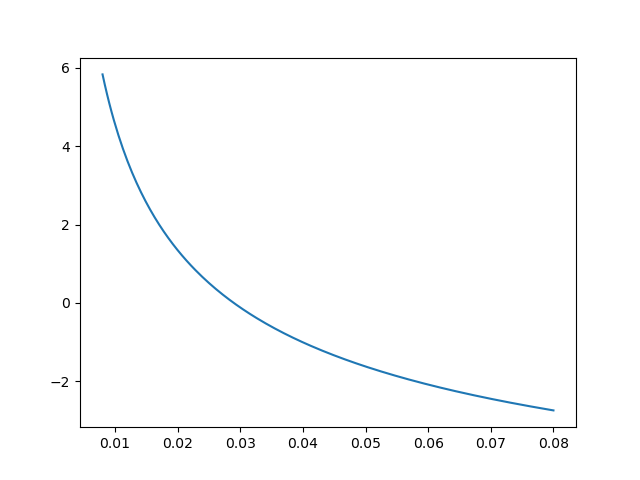

In [58]:
def funcao(f):
    D = 0.005
    ep = 0.0000015
    V = 40
    rho = 1.23
    mu = 1.79*10**(-5)
    Re = rho*V*D/mu
    r = 1/np.sqrt(f) + 2*np.log10(ep/(3.7*D) + 2.51/(Re*np.sqrt(f)))
    return r

#r = funcao(0.008)
#print(r)
X = np.linspace(0.008, 0.08, 200)
Y = funcao(X)
plt.figure()
plt.plot(X,Y)

#opt.root_scalar(funcao, bracket=[0.008, 0.08])